## Read in data

In [14]:
import pandas as pd
diabetes = pd.read_sas('C:/Users/yzh7381/Dropbox/Diabetes/Data/LLCP2022.xpt')

In [15]:
print(diabetes.shape)

(445132, 328)


In [16]:
diabetes['_STATE'].nunique()

54

## Identify relevant features and target variables

**22 features were identified, including:**

20 categorical features：

    Sex of respondent (SEXVAR)

    General health (GENHLTH)

    Have personal health care provider (PERSDOC3)

    Exercise in past 30 days (EXERANY2)

    Ever diagnosed with heart attack (CVDINFR4)

    Ever diagnosed with angina or coronary heart disease (CVDCRHD4)

    Ever Diagnosed with a stroke (CVDSTRK3)

    Ever told had asthma (ASTHMA3)

    Ever told you had a depressive disorder (ADDEPEV3)

    Ever told you have kidney disease (CHCKDNY2)

    Marital status (MARITAL)

    Have you ever been told you tested positive for COVID19? (COVIDPOS)

    Race/ethnicity (_IMPRACE) 

    Physical health status (_PHYS14D)

    Mental health status (_MENT14D)

    Age group (_AGE_G)

    BMI category (_BMI5CAT)

    Education level (_EDUCAG)

    Income level (_INCOMG1)

    Smoking status (_SMOKER3)

2 continuous features:

    How much time do you sleep (SLEPTIM1)
    
    Number of drinks of alcohol beverages per week (_DRNKWK2)

**Below is the target variable:**

Ever told you had diabetes (DIABETE4)

    1 = Yes
    2 = Yes, but female told only during pregnancy
    3 = No
    4 = No, pre-diabetes or borderline diabetes


In [17]:
# select variables
selected_variables = [
    'SEXVAR', 'GENHLTH', 'PERSDOC3', 'EXERANY2', 'SLEPTIM1', 'CVDINFR4',
    'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ADDEPEV3', 'CHCKDNY2', 'MARITAL',
    'COVIDPOS', '_IMPRACE', '_PHYS14D', '_MENT14D', '_AGE_G', '_BMI5CAT', 
    '_EDUCAG', '_INCOMG1', '_SMOKER3', '_DRNKWK2', 'DIABETE4'
]
diabetes_selected = diabetes[selected_variables]
print(diabetes_selected.shape)

(445132, 23)


## Data preprocessing

**1. Checking missing values**

In [22]:
# Check for missing values (blank)
missing_values = diabetes_selected.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 SEXVAR          0
GENHLTH         3
PERSDOC3        2
EXERANY2        2
SLEPTIM1        3
CVDINFR4        4
CVDCRHD4        2
CVDSTRK3        2
ASTHMA3         2
ADDEPEV3        7
CHCKDNY2        2
MARITAL         8
COVIDPOS    49235
_IMPRACE        0
_PHYS14D        0
_MENT14D        0
_AGE_G          0
_BMI5CAT    48806
_EDUCAG         0
_INCOMG1        0
_SMOKER3        0
_DRNKWK2        0
DIABETE4        3
dtype: int64


**2. Drop records with small missing values and impute features with a large portion of missingness**

In [23]:
# Drop rows with missing values except 'COVIDPOS' and '_BMI5CAT'
diabetes_complete = diabetes_selected.dropna(subset=[col for col in diabetes_selected.columns if col not in ['COVIDPOS', '_BMI5CAT']], how='any')

In [24]:
print(diabetes_complete.isnull().sum())

SEXVAR          0
GENHLTH         0
PERSDOC3        0
EXERANY2        0
SLEPTIM1        0
CVDINFR4        0
CVDCRHD4        0
CVDSTRK3        0
ASTHMA3         0
ADDEPEV3        0
CHCKDNY2        0
MARITAL         0
COVIDPOS    49228
_IMPRACE        0
_PHYS14D        0
_MENT14D        0
_AGE_G          0
_BMI5CAT    48799
_EDUCAG         0
_INCOMG1        0
_SMOKER3        0
_DRNKWK2        0
DIABETE4        0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer

# Mode imputation for COVIDPOS and _BMI5CAT due to a larger portion of missing values in these two features
categorical_cols = ['COVIDPOS', '_BMI5CAT']
cat_imputer = SimpleImputer(strategy='most_frequent')
diabetes_complete[categorical_cols] = cat_imputer.fit_transform(diabetes_complete[categorical_cols])

C:\Users\yzh7381\AppData\Local\Temp\ipykernel_28768\638372393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_complete[categorical_cols] = cat_imputer.fit_transform(diabetes_complete[categorical_cols])


In [26]:
print(diabetes_complete.isnull().sum())

SEXVAR      0
GENHLTH     0
PERSDOC3    0
EXERANY2    0
SLEPTIM1    0
CVDINFR4    0
CVDCRHD4    0
CVDSTRK3    0
ASTHMA3     0
ADDEPEV3    0
CHCKDNY2    0
MARITAL     0
COVIDPOS    0
_IMPRACE    0
_PHYS14D    0
_MENT14D    0
_AGE_G      0
_BMI5CAT    0
_EDUCAG     0
_INCOMG1    0
_SMOKER3    0
_DRNKWK2    0
DIABETE4    0
dtype: int64


In [40]:
diabetes_complete.shape

(445115, 23)

In [41]:
# Delete missing values that were coded other than left blank
conditions = {
    'GENHLTH': [7, 9],
    'PERSDOC3': [7, 9],
    'EXERANY2': [7, 9],
    'CVDINFR4': [7, 9],
    'CVDCRHD4': [7, 9],
    'CVDSTRK3': [7, 9],
    'ASTHMA3': [7, 9],
    'ADDEPEV3': [7, 9],
    'CHCKDNY2': [7, 9],
    'MARITAL': [9],
    'COVIDPOS': [7, 9],
    '_PHYS14D': [9],
    '_MENT14D': [9],
    '_EDUCAG': [9],
    '_INCOMG1': [9],
    '_SMOKER3': [9],
    'SLEPTIM1': [77, 99],
    '_DRNKWK2': [99900],
    'DIABETE4': [7, 9]
}

# Drop rows based on conditions
for column, values in conditions.items():
    diabetes_complete = diabetes_complete[~diabetes_complete[column].isin(values)]

# Reset the index of diabetes_complete and drop rows based on the mask
diabetes_clean = diabetes_complete.reset_index(drop=True)[~mask].copy()

C:\Users\yzh7381\AppData\Local\Temp\ipykernel_28768\153254632.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_clean = diabetes_complete.reset_index(drop=True)[~mask].copy()


In [42]:
print(diabetes_clean.shape)

(203219, 23)


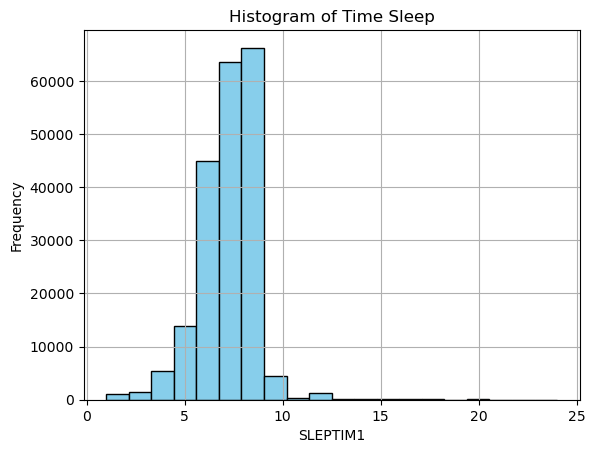

In [53]:
import matplotlib.pyplot as plt

# Plot histogram of 'SLEPTIM1'
plt.hist(diabetes_clean['SLEPTIM1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Time Sleep')
plt.xlabel('SLEPTIM1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

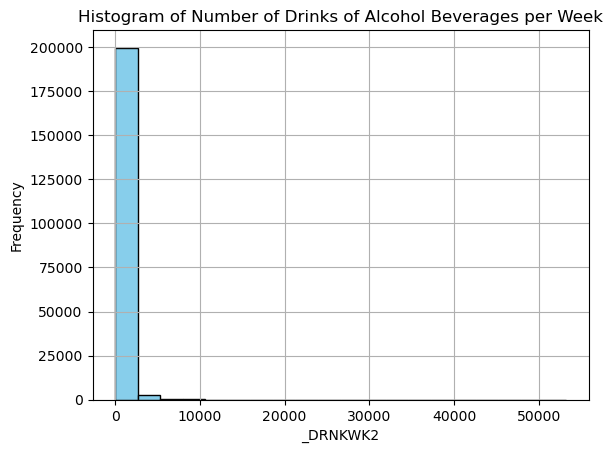

In [54]:
# Plot histogram of '_DRNKWK2'
plt.hist(diabetes_clean['_DRNKWK2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Drinks of Alcohol Beverages per Week')
plt.xlabel('_DRNKWK2')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [55]:
diabetes_clean['DIABETE4'].value_counts() # Check the counts of each category for the target variable

3.0    169509
1.0     27347
4.0      4557
2.0      1806
Name: DIABETE4, dtype: int64

## Build NN

**1. One-hot encoding features**

In [74]:
categorical_cols = [
    'SEXVAR', 'GENHLTH', 'PERSDOC3', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4',
    'CVDSTRK3', 'ASTHMA3', 'ADDEPEV3', 'CHCKDNY2', 'MARITAL', 'COVIDPOS',
    '_IMPRACE', '_PHYS14D', '_MENT14D', '_AGE_G', '_BMI5CAT', 
    '_EDUCAG', '_INCOMG1', '_SMOKER3'
]

diabetes_encoded = pd.get_dummies(diabetes_clean, columns=categorical_cols)

In [75]:
print(diabetes_encoded.head())

   SLEPTIM1      _DRNKWK2  DIABETE4  SEXVAR_1.0  SEXVAR_2.0  GENHLTH_1.0  \
1       5.0  5.397605e-79       3.0           0           1            0   
2       9.0  1.400000e+02       3.0           0           1            0   
4       8.0  5.397605e-79       3.0           0           1            0   
6       7.0  2.300000e+01       1.0           0           1            0   
7       8.0  5.397605e-79       3.0           0           1            0   

   GENHLTH_2.0  GENHLTH_3.0  GENHLTH_4.0  GENHLTH_5.0  ...  _INCOMG1_2.0  \
1            1            0            0            0  ...             0   
2            0            0            1            0  ...             0   
4            0            1            0            0  ...             0   
6            0            1            0            0  ...             0   
7            0            0            1            0  ...             0   

   _INCOMG1_3.0  _INCOMG1_4.0  _INCOMG1_5.0  _INCOMG1_6.0  _INCOMG1_7.0  \
1          

**2. Split training and test sets**

In [81]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [82]:
# Define the target and features
X = diabetes_encoded.drop(columns=['DIABETE4'])
y = diabetes_encoded['DIABETE4']

In [84]:
# One-hot encode the target variable
y = pd.get_dummies(y).values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [87]:
# Check the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (152414, 73) (152414, 4)
Test set shape: (50805, 73) (50805, 4)


**3. First, build a NN model with a single hidden layer**

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [133]:
# Build the neural network using the Sequential model with an Input layer
model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

In [134]:
# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [135]:
# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.25)

Epoch 1/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - accuracy: 0.7845 - loss: 6.9813 - val_accuracy: 0.8319 - val_loss: 0.6467
Epoch 2/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8325 - loss: 0.6382 - val_accuracy: 0.8348 - val_loss: 0.5136
Epoch 3/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8361 - loss: 0.6232 - val_accuracy: 0.8343 - val_loss: 0.6085
Epoch 4/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.8344 - loss: 0.5840 - val_accuracy: 0.7993 - val_loss: 0.6334
Epoch 5/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.8338 - loss: 0.5660 - val_accuracy: 0.8321 - val_loss: 0.4883
Epoch 6/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.8356 - loss: 0.5590 - val_accuracy: 0.8351 - val_loss: 0.5513
Epoch 7/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.8342 - loss: 0.5647 - val_accuracy: 0.8352 - val_loss: 0.5214
Epoch 8/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8366 -

1787/1787 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8444 - loss: 0.4380 - val_accuracy: 0.8345 - val_loss: 0.4723


In [136]:
print(model_1.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,502 (29.31 KB)

 Trainable params: 2,500 (9.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,002 (19.54 KB)

None


**4. Plot the training and validation loss**

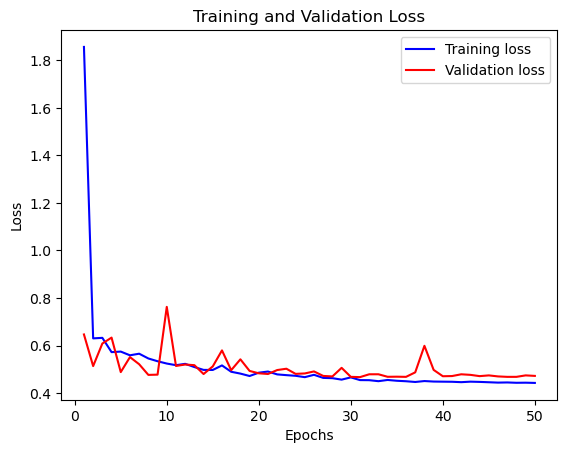

In [137]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [138]:
# Evaluate the model on the test data
loss_1, accuracy_1 = model_1.evaluate(X_test, y_test, batch_size=64)

# Print the loss value and accuracy value
print("Test Loss:", loss_1)
print("Test Accuracy:", accuracy_1)

794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8375 - loss: 0.4580
Test Loss: 0.4623155891895294
Test Accuracy: 0.837023913860321


**5. Add a dropout layer**

In [140]:
from keras.layers import Dropout

In [141]:
# Build a model with dropout regularization
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(y_train.shape[1], activation='softmax')
])

In [142]:
# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [143]:
# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.25)

Epoch 1/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - accuracy: 0.7016 - loss: 15.2027 - val_accuracy: 0.8322 - val_loss: 0.6273
Epoch 2/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.8374 - loss: 0.5598 - val_accuracy: 0.8341 - val_loss: 0.4942
Epoch 3/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.8377 - loss: 0.4874 - val_accuracy: 0.8349 - val_loss: 0.4755
Epoch 4/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8387 - loss: 0.4757 - val_accuracy: 0.8349 - val_loss: 0.4862
Epoch 5/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.8368 - loss: 0.4774 - val_accuracy: 0.8336 - val_loss: 0.4775
Epoch 6/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8372 - loss: 0.4745 - val_accuracy: 0.8352 - val_loss: 0.4716
Epoch 7/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.8387 - loss: 0.4661 - val_accuracy: 0.8353 - val_loss: 0.4738
Epoch 8/50
1787/1787 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8393 - 

1787/1787 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.8398 - loss: 0.4593 - val_accuracy: 0.8343 - val_loss: 0.4693


In [157]:
print(model_2.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 32)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,502 (29.31 KB)

 Trainable params: 2,500 (9.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,002 (19.54 KB)

None


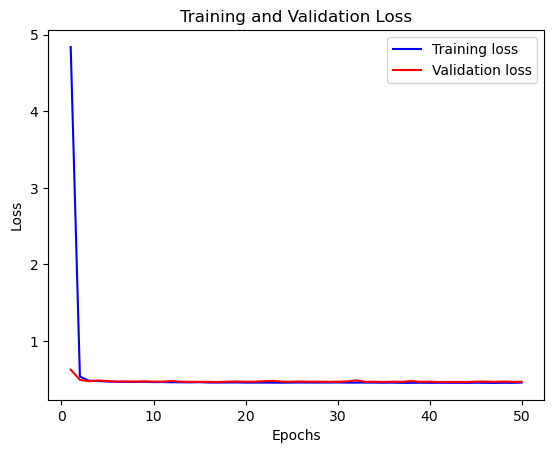

In [144]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [146]:
# Evaluate the model on the test data
loss_2, accuracy_2 = model_2.evaluate(X_test, y_test, batch_size=64)

# Print the loss value and accuracy value
print("Test Loss:", loss_2)
print("Test Accuracy:", accuracy_2)

794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8364 - loss: 0.4584
Test Loss: 0.4604651927947998
Test Accuracy: 0.8362759351730347


**6. Try model with early stopping**

In [178]:
from tensorflow.keras.callbacks import EarlyStopping

In [179]:
# Further split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [182]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [183]:
# Train the model with early stopping
history_3 = model_2.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 2s 674us/step - accuracy: 0.8399 - loss: 0.4609 - val_accuracy: 0.8388 - val_loss: 0.4545
Epoch 2/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 2s 658us/step - accuracy: 0.8394 - loss: 0.4576 - val_accuracy: 0.8376 - val_loss: 0.4599
Epoch 3/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - accuracy: 0.8388 - loss: 0.4596 - val_accuracy: 0.8386 - val_loss: 0.4545
Epoch 4/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 2s 673us/step - accuracy: 0.8399 - loss: 0.4597 - val_accuracy: 0.8388 - val_loss: 0.4558
Epoch 5/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 2s 726us/step - accuracy: 0.8382 - loss: 0.4607 - val_accuracy: 0.8387 - val_loss: 0.4552
Epoch 6/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 3s 998us/step - accuracy: 0.8376 - loss: 0.4612 - val_accuracy: 0.8377 - val_loss: 0.4586
Epoch 7/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step - accuracy: 0.8376 - loss: 0.4632 - val_accuracy: 0.8391 - val_loss: 0.4619
Epoch 8/50
2858/2858 ━━━━━━━━━━━━━━━━━━━━ 3s 948us/step - accuracy: 0.8398 -

In [184]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.8377 - loss: 0.4562
Test Loss: 0.4591273367404938
Test Accuracy: 0.8368664383888245


**7. Try more hidden layers**

In [185]:
from keras.layers import Dense, Dropout, BatchNormalization

In [216]:
model_3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

In [217]:
# Compile the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [218]:
# Train the model
history_4 = model_3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.25)

Epoch 1/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8028 - loss: 0.6092 - val_accuracy: 0.8334 - val_loss: 0.4957
Epoch 2/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.8344 - loss: 0.4967 - val_accuracy: 0.8333 - val_loss: 0.4984
Epoch 3/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.8377 - loss: 0.4795 - val_accuracy: 0.8370 - val_loss: 0.4733
Epoch 4/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.8387 - loss: 0.4727 - val_accuracy: 0.8337 - val_loss: 0.4699
Epoch 5/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8360 - loss: 0.4750 - val_accuracy: 0.8355 - val_loss: 0.4639
Epoch 6/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8358 - loss: 0.4700 - val_accuracy: 0.8373 - val_loss: 0.4653
Epoch 7/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8391 - loss: 0.4662 - val_accuracy: 0.8375 - val_loss: 0.4683
Epoch 8/10
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8381 - loss: 0.4

In [219]:
print(model_3.summary())

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 64)             │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,982 (109.31 KB)

 Trainable params: 9,284 (36.27 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 18,570 (72.54 KB)

None


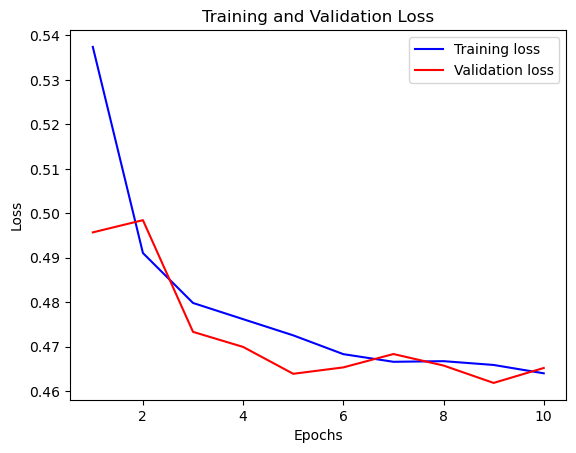

In [220]:
# Get training and validation loss from the history object
train_loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [221]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.8356 - loss: 0.4629
Test Loss: 0.4648039937019348
Test Accuracy: 0.8362562656402588


**8. Increase model complexity**

In [239]:
model_4 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),       
    BatchNormalization(),                 
    Dense(64, activation='relu'),        
    Dropout(0.5),                         
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [240]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [241]:
history_5 = model_4.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.25)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8311 - loss: 0.5568 - val_accuracy: 0.8335 - val_loss: 0.5242
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8355 - loss: 0.4884 - val_accuracy: 0.8337 - val_loss: 0.5007
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8350 - loss: 0.4815 - val_accuracy: 0.8379 - val_loss: 0.4872
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8362 - loss: 0.4700 - val_accuracy: 0.8384 - val_loss: 0.4910
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8379 - loss: 0.4618 - val_accuracy: 0.8379 - val_loss: 0.4751
Epoch 6/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8382 - loss: 0.4624 - val_accuracy: 0.8370 - val_loss: 0.4814
Epoch 7/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8387 - loss: 0.4616 - val_accuracy: 0.8366 - val_loss: 0.4718
Epoch 8/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8403 - loss: 0.4595 - val_accuracy: 0.

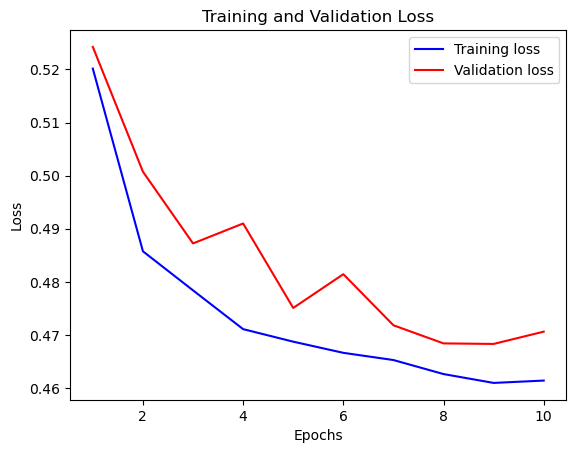

In [242]:
# Get training and validation loss from the history object
train_loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [243]:
test_loss, test_accuracy = model_4.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1588/1588 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.8343 - loss: 0.4686
Test Loss: 0.47118517756462097
Test Accuracy: 0.8344848155975342


## Conclusion

The two layer NN model with early stopping has the best performance among the model tried. With a test loss of 0.459 and a test accuracy of 0.837, the two layer model seems to generalize well to unseen data.